In [1]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
print(os.getcwd())

/Users/michaelmeraj/Desktop/projects/Kaggle_dataset_Supercar_Acceleration_prediction/notebooks


In [3]:
# # Display options
# pd.set_option('display.max_columns', None)
# sns.set(style="whitegrid")


In [5]:
df = pd.read_csv('../data/processed//5000_car_dataset_TRANSMISSION_FIXED_FINAL (1).csv')
df.head()


,Brand,Model,Year,Horsepower,Engine_Size,Weight,Torque,Acceleration_0_100,Power_Weight,Torque_Weight,Drivetrain,Transmission
0,Rolls-Royce,Ghost,2024,592,2.9,5371,639,4.46,0.110222,0.118972,RWD,Auto
1,Bentley,Continental GT Speed,2018,637,6.3,5051,697,3.51,0.126114,0.137992,AWD,DCT
2,McLaren,720S,2017,711,3.7,3057,751,2.79,0.232581,0.245666,AWD,DCT
3,BMW,XM Label Red,2024,737,2.3,6007,776,3.78,0.122690,0.129183,AWD,Auto
4,Bugatti,Chiron,2022,1487,4.3,4403,1758,2.36,0.337724,0.399273,RWD,DCT


In [6]:
categorical_cols = ['Drivetrain', 'Transmission']

print("Categorical features available:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Values: {df[col].unique()}")  # Show first 10
        print(f"  Missing: {df[col].isnull().sum()}")

Categorical features available:

Drivetrain:
  Unique values: 2
  Values: ['RWD' 'AWD']
  Missing: 0

Transmission:
  Unique values: 2
  Values: ['Auto' 'DCT']
  Missing: 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Horsepower          5000 non-null   int64  
 4   Engine_Size         5000 non-null   float64
 5   Weight              5000 non-null   int64  
 6   Torque              5000 non-null   int64  
 7   Acceleration_0_100  5000 non-null   float64
 8   Power_Weight        5000 non-null   float64
 9   Torque_Weight       5000 non-null   float64
 10  Drivetrain          5000 non-null   object 
 11  Transmission        5000 non-null   object 
dtypes: float64(4), int64(4), object(4)
memory usage: 468.9+ KB


In [8]:
df.shape


(5000, 12)

In [9]:
df.describe

<bound method NDFrame.describe of              Brand                 Model  Year  Horsepower  Engine_Size  \
0      Rolls-Royce                 Ghost  2024         592          2.9   
1          Bentley  Continental GT Speed  2018         637          6.3   
2          McLaren                  720S  2017         711          3.7   
3              BMW          XM Label Red  2024         737          2.3   
4          Bugatti                Chiron  2022        1487          4.3   
...            ...                   ...   ...         ...          ...   
4995           BMW        M8 Competition  2021         616          6.2   
4996       Porsche            911 GT2 RS  2018         696          7.5   
4997           BMW        M8 Competition  2022         616          7.6   
4998  Aston Martin              DB11 AMR  2020         627          8.0   
4999       Ferrari         SF90 Stradale  2020         981          2.0   

      Weight  Torque  Acceleration_0_100  Power_Weight  Torque_We

In [10]:
df.head(15)["Brand"]

0      Rolls-Royce
1          Bentley
2          McLaren
3              BMW
4          Bugatti
5          McLaren
6     Aston Martin
7      Lamborghini
8     Mercedes-AMG
9          Ferrari
10     Rolls-Royce
11         Bentley
12     Rolls-Royce
13         Porsche
14     Rolls-Royce
Name: Brand, dtype: object

In [11]:
df.tail()["Year"]

4995    2021
4996    2018
4997    2022
4998    2020
4999    2020
Name: Year, dtype: int64

In [12]:
df.tail(10)["Year"]

4990    2015
4991    2021
4992    2019
4993    2022
4994    2023
4995    2021
4996    2018
4997    2022
4998    2020
4999    2020
Name: Year, dtype: int64

In [13]:
df.columns

Index(['Brand', 'Model', 'Year', 'Horsepower', 'Engine_Size', 'Weight',
       'Torque', 'Acceleration_0_100', 'Power_Weight', 'Torque_Weight',
       'Drivetrain', 'Transmission'],
      dtype='object')

In [14]:
test= df[["Year","Horsepower","Engine_Size","Weight","Torque", "Acceleration_0_100"]].head()


In [15]:
test.head()

,Year,Horsepower,Engine_Size,Weight,Torque,Acceleration_0_100
0,2024,592,2.9,5371,639,4.46
1,2018,637,6.3,5051,697,3.51
2,2017,711,3.7,3057,751,2.79
3,2024,737,2.3,6007,776,3.78
4,2022,1487,4.3,4403,1758,2.36


In [16]:
test_sorted = test.sort_values(by="Year",ascending=True)
test_sorted.head()

,Year,Horsepower,Engine_Size,Weight,Torque,Acceleration_0_100
2,2017,711,3.7,3057,751,2.79
1,2018,637,6.3,5051,697,3.51
4,2022,1487,4.3,4403,1758,2.36
0,2024,592,2.9,5371,639,4.46
3,2024,737,2.3,6007,776,3.78


In [17]:
# seems like there is a stronger relationship between torque and 0-60 more than the others. 


In [18]:
df_sf = df[["Year","Horsepower","Engine_Size","Weight","Torque", "Acceleration_0_100"]]

In [19]:
df_sf_sorted = df_sf.sort_values(by="Acceleration_0_100",ascending=True)

In [20]:
df_sf_sorted.head(10)

,Year,Horsepower,Engine_Size,Weight,Torque,Acceleration_0_100
2997,2022,968,7.9,3824,1129,2.00
3753,2024,983,3.4,3654,1029,2.00
4787,2021,989,3.1,3675,1008,2.00
293,2022,969,7.8,3880,994,2.01
1445,2020,965,7.5,3753,1015,2.01
1551,2023,981,6.7,3789,1168,2.01
1410,2022,976,5.4,3626,1086,2.01
3944,2020,1000,3.7,3627,934,2.01
1333,2022,981,6.9,3774,969,2.02
1158,2021,996,3.0,3603,1059,2.02


In [21]:
df["Acceleration_0_100"].min()

2.0

In [22]:
df_sf_sorted.describe()

,Year,Horsepower,Engine_Size,Weight,Torque,Acceleration_0_100
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2020.784800,781.798000,5.016100,4169.020400,820.915400,3.142200
std,2.854141,288.885692,1.735305,872.852757,313.202473,0.718862
min,2010.000000,500.000000,2.000000,2701.000000,462.000000,2.000000
25%,2019.000000,615.000000,3.500000,3379.000000,635.000000,2.660000
50%,2021.000000,673.500000,5.000000,4072.000000,710.000000,3.020000
75%,2023.000000,763.000000,6.500000,4660.500000,841.000000,3.590000
max,2024.000000,1600.000000,8.000000,6100.000000,1915.000000,5.400000


In [23]:
# visuals
# makes plots look clean'
sns.set(style="whitegrid", palette="deep")
plt.rcParams["figure.figsize"] = (12, 10) 

In [24]:
df_sf_sorted.sort_values(by=["Horsepower", "Acceleration_0_100"], ascending=[False, True])

,Year,Horsepower,Engine_Size,Weight,Torque,Acceleration_0_100
3548,2023,1600,7.7,4499,1582,2.11
4181,2023,1600,5.2,4424,1803,2.15
1378,2023,1600,7.7,4376,1705,2.15
4186,2024,1600,4.9,4398,1618,2.16
3204,2024,1600,5.7,4408,1754,2.19
...,...,...,...,...,...,...
3245,2022,500,7.9,3294,586,3.14
2129,2022,500,2.2,3232,593,3.14
3014,2019,500,7.1,3204,534,3.18
4955,2018,500,7.3,3265,526,3.24


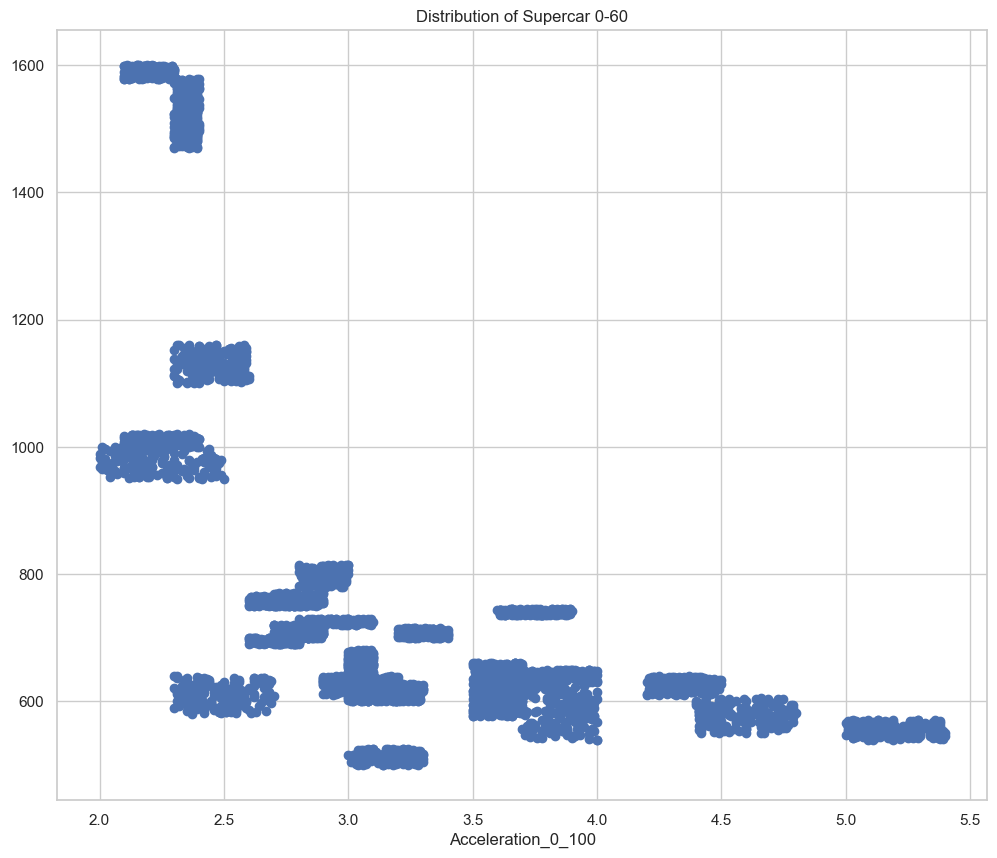

In [25]:
plt.scatter(df["Acceleration_0_100"],(df["Horsepower"]))
plt.title("Distribution of Supercar 0-60")
plt.xlabel("Acceleration_0_100")
plt.ylabel("")
plt.show()

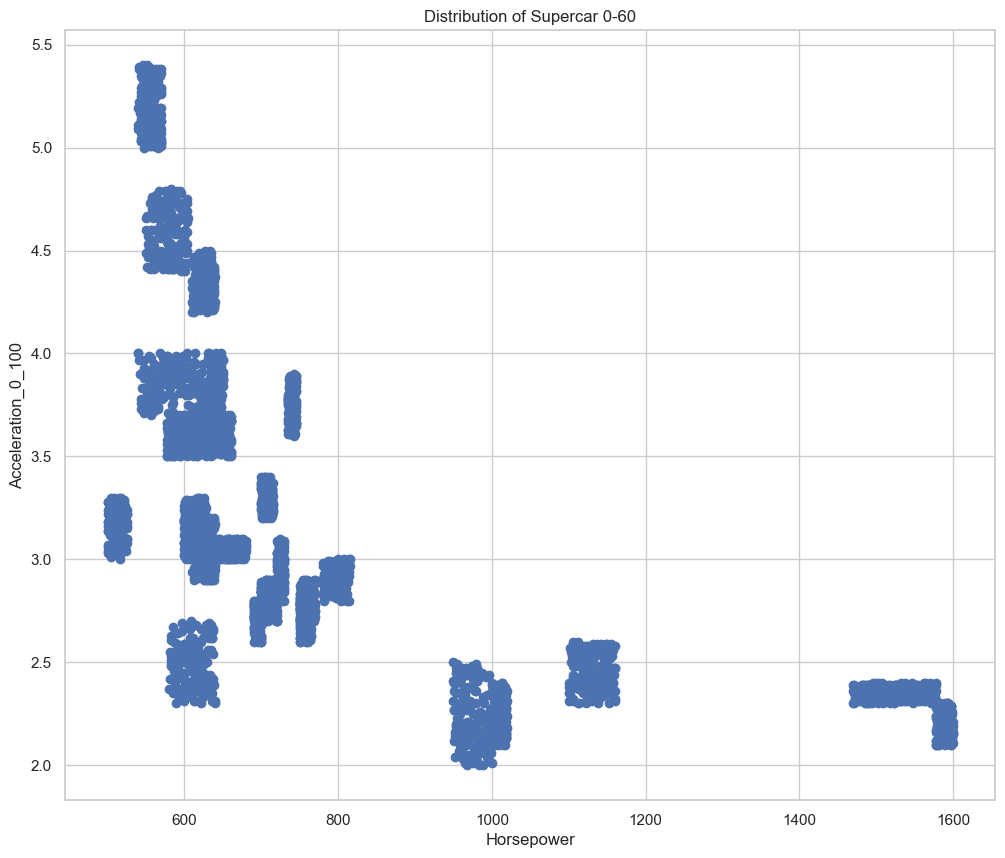

In [26]:
plt.scatter(df["Horsepower"],df["Acceleration_0_100"])
plt.title("Distribution of Supercar 0-60")
plt.xlabel("Horsepower")
plt.ylabel("Acceleration_0_100")
plt.show()

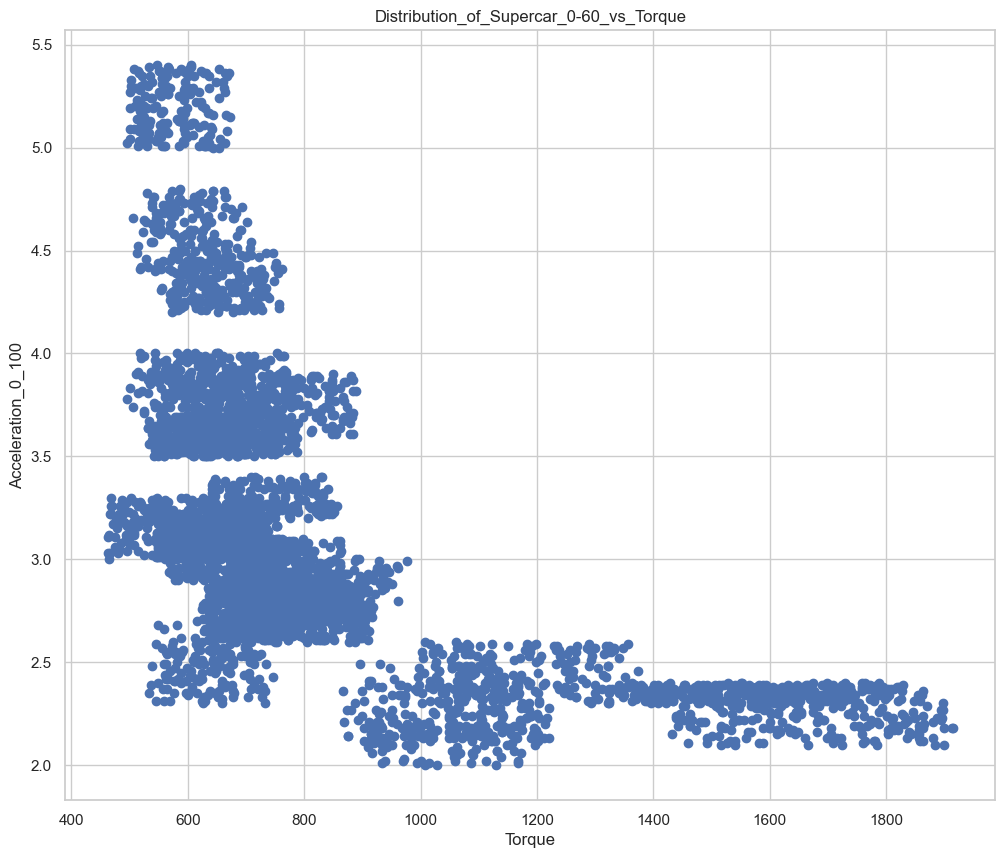

In [27]:
plt.scatter(df["Torque"],df["Acceleration_0_100"])
plt.title("Distribution_of_Supercar_0-60_vs_Torque")
plt.xlabel("Torque")
plt.ylabel("Acceleration_0_100")
plt.savefig('Distribution_of_Supercar_0-60_vs_Torque.png')
plt.show()


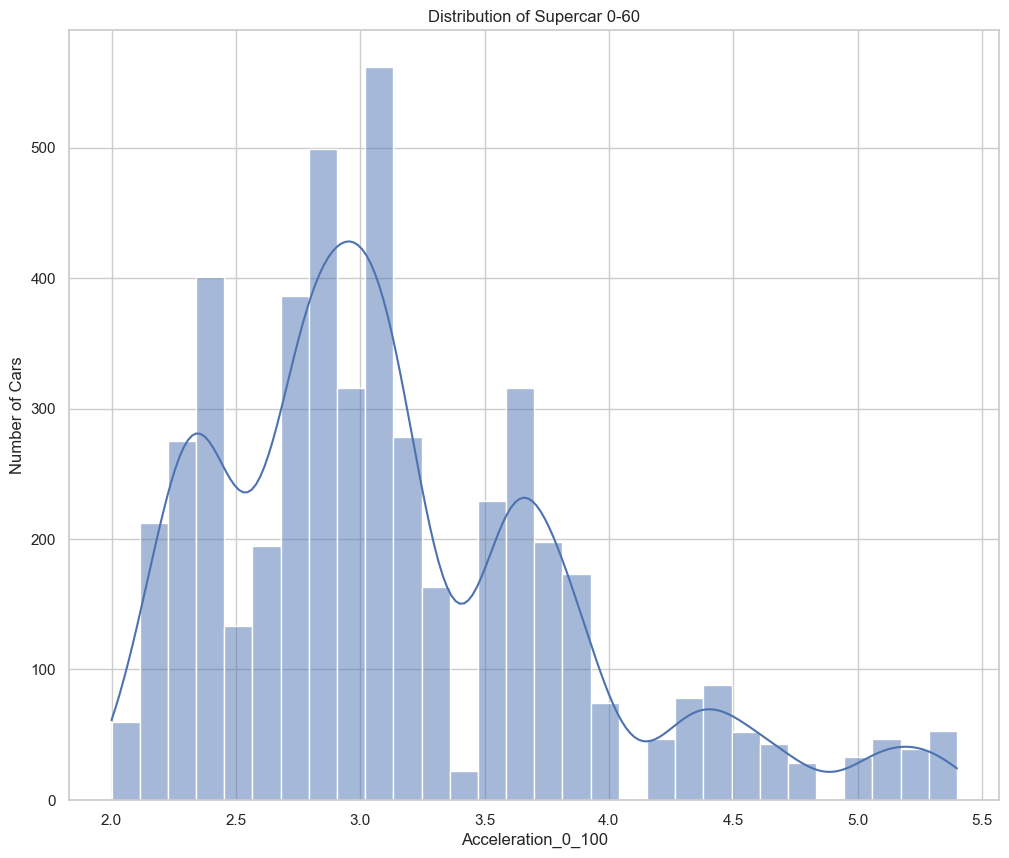

In [28]:
sns.histplot(df["Acceleration_0_100"], bins=30, kde=True)
plt.title("Distribution of Supercar 0-60")
plt.xlabel("Acceleration_0_100")
plt.ylabel("Number of Cars")
plt.show()

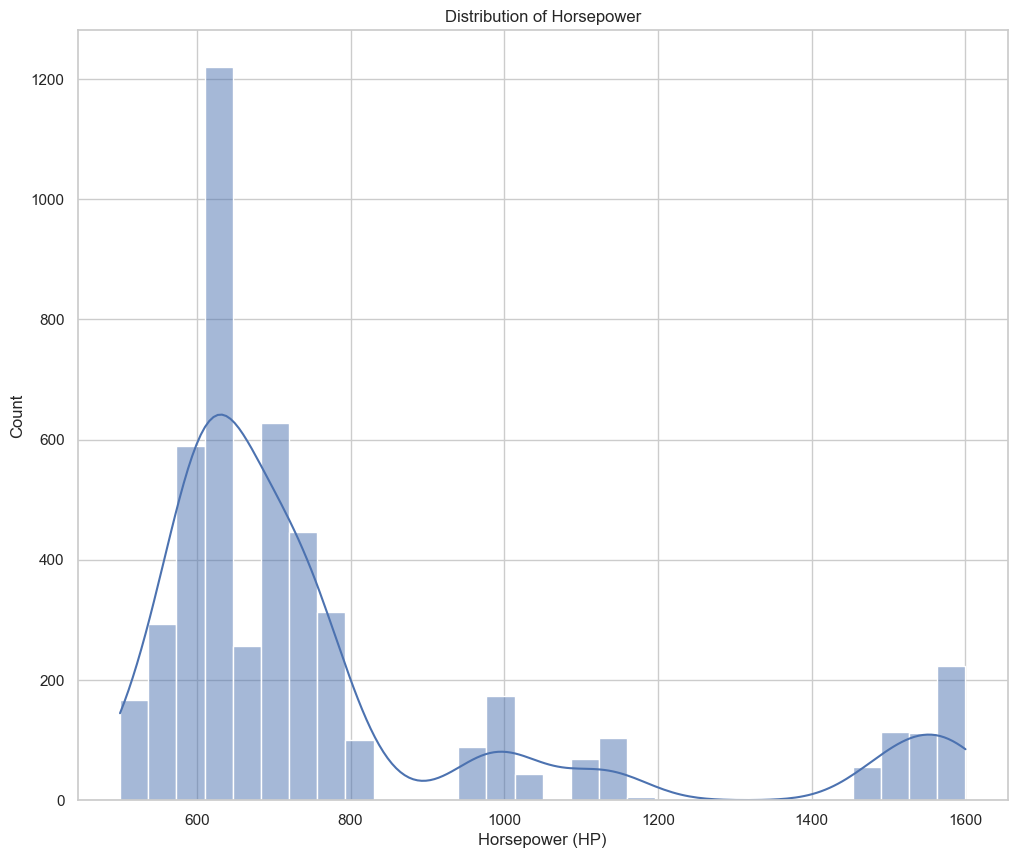

In [29]:
sns.histplot(df["Horsepower"], bins=30, kde=True)
plt.title("Distribution of Horsepower")
plt.xlabel("Horsepower (HP)")
plt.show()

In [30]:
min_0to60 = df["Acceleration_0_100"].min()
max_0to60 = df["Acceleration_0_100"].max()
print("lowest 0-60:", min_0to60)
print("highest 0-60:", max_0to60)


lowest 0-60: 2.0
highest 0-60: 5.4


In [31]:
df["Acceleration_0_100"].describe()

count    5000.000000
mean        3.142200
std         0.718862
min         2.000000
25%         2.660000
50%         3.020000
75%         3.590000
max         5.400000
Name: Acceleration_0_100, dtype: float64

In [32]:
year_counts = df["Acceleration_0_100"].value_counts().sort_index()
print(year_counts)

Acceleration_0_100
2.00    3
2.01    5
2.02    6
2.03    1
2.04    2
       ..
5.36    7
5.37    5
5.38    6
5.39    3
5.40    2
Name: count, Length: 294, dtype: int64


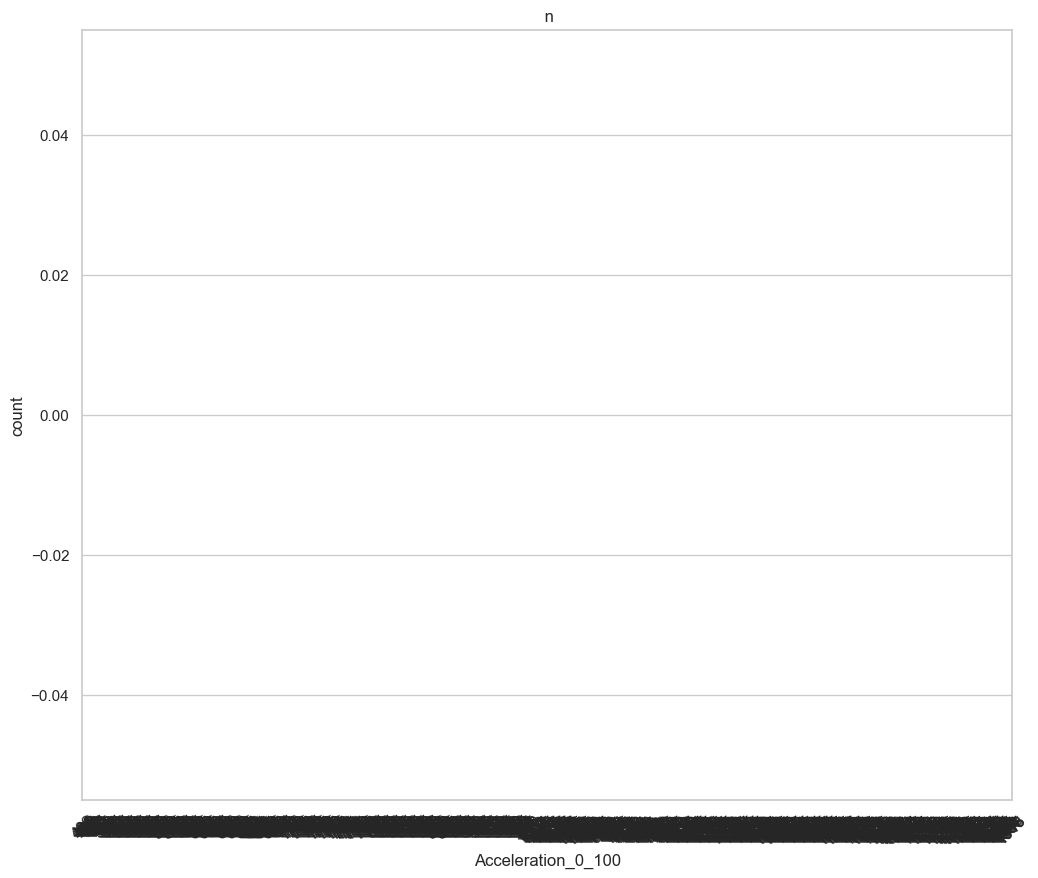

In [33]:
sns.countplot(x="Acceleration_0_100", data=df, order=sorted(df["Torque"].unique()))
plt.title(" n")
plt.xticks(rotation=45)
plt.show()

In [34]:
# avg_price_per_year = df.groupby("Acceleration_0_100")["Mileage"].mean()
# sns.lineplot(x=avg_price_per_year.index, y=avg_price_per_year.values)
# plt.title("Average mileage by0 to 60")
# plt.xlabel("Acceleration_0_100")
# plt.ylabel("Mileage")
# plt.show()

In [35]:
# exploration of missing values


In [36]:
# exploration of missing values


In [37]:
# Check missing values
df.isnull().sum()

Brand                 0
Model                 0
Year                  0
Horsepower            0
Engine_Size           0
Weight                0
Torque                0
Acceleration_0_100    0
Power_Weight          0
Torque_Weight         0
Drivetrain            0
Transmission          0
dtype: int64

In [38]:
# Check year range
print("Year range:", df["Acceleration_0_100"].min(), "-", df["Acceleration_0_100"].max())

Year range: 2.0 - 5.4


In [39]:
# Check number of cars per Acceleration_0_100
print(df["Acceleration_0_100"].value_counts().sort_index())

Acceleration_0_100
2.00    3
2.01    5
2.02    6
2.03    1
2.04    2
       ..
5.36    7
5.37    5
5.38    6
5.39    3
5.40    2
Name: count, Length: 294, dtype: int64


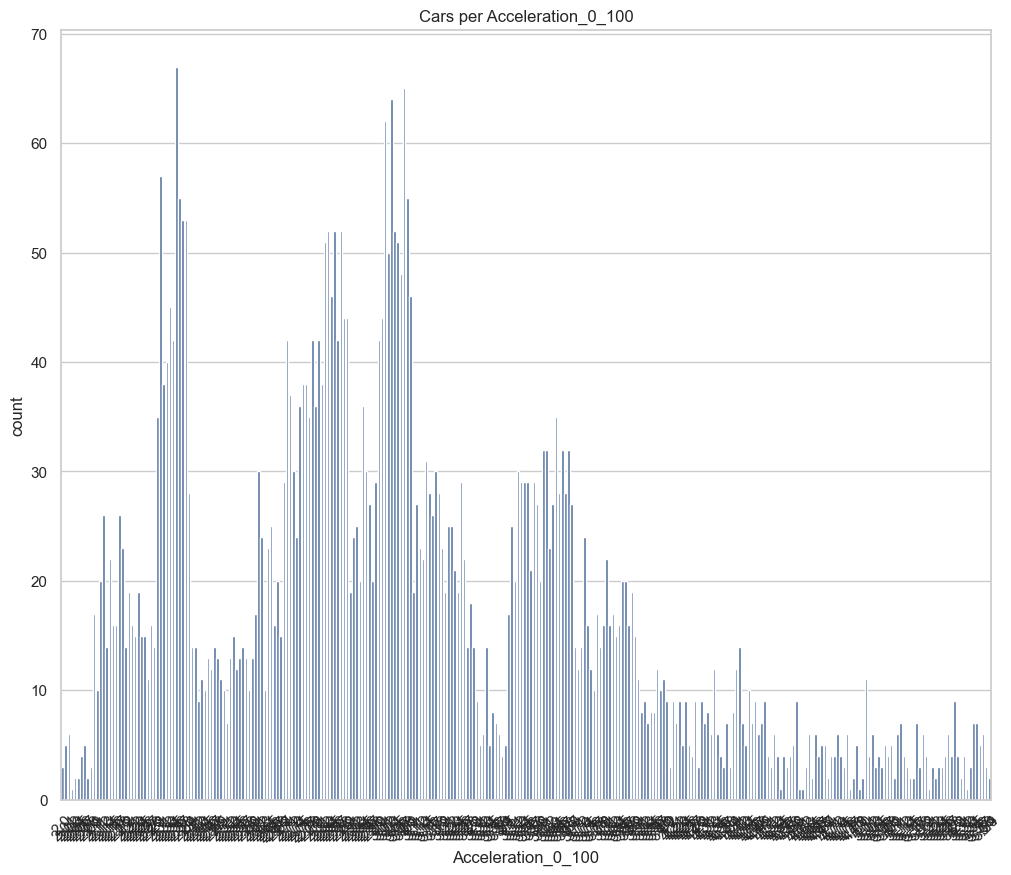

In [40]:

# Quick plot
sns.countplot(x="Acceleration_0_100", data=df, order=sorted(df["Acceleration_0_100"].unique()))
plt.xticks(rotation=45)
plt.title("Cars per Acceleration_0_100")
plt.show()

In [41]:
(df == 0).sum() 

Brand                 0
Model                 0
Year                  0
Horsepower            0
Engine_Size           0
Weight                0
Torque                0
Acceleration_0_100    0
Power_Weight          0
Torque_Weight         0
Drivetrain            0
Transmission          0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
# outliers

In [44]:
df["Brand"].unique()[:20]

array(['Rolls-Royce', 'Bentley', 'McLaren', 'BMW', 'Bugatti',
       'Aston Martin', 'Lamborghini', 'Mercedes-AMG', 'Ferrari',
       'Porsche'], dtype=object)

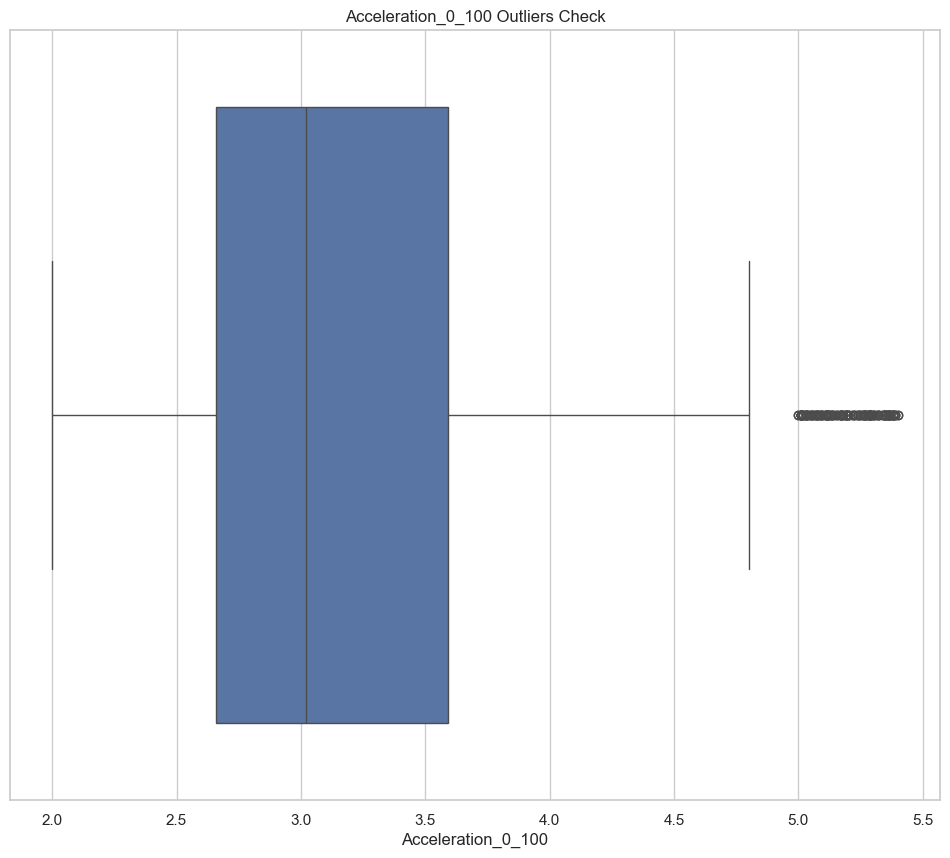

count    5000.000000
mean        3.142200
std         0.718862
min         2.000000
25%         2.660000
50%         3.020000
75%         3.590000
max         5.400000
Name: Acceleration_0_100, dtype: float64

In [45]:
sns.boxplot(x=df["Acceleration_0_100"])
plt.title("Acceleration_0_100 Outliers Check")
plt.show()

df["Acceleration_0_100"].describe()

In [46]:
# the dataset is clean. 
# there is a strong inverse relation ship between torque and 0-60
# there is a strong inverse relation ship between Horsepower and 0-60
#  seems to not matter too much, in cell [64] we see the graph.
# top speed has more of a complex relationship and we have to take everything else into acocunt
# weight has a dirct relationship. but  is effect by other factors. 
# engine size have a direct to complex relationship, some big engins give off fast 0-60 some small engines have higher 0-60.




In [47]:
#check for the relationship of electric and other fuel types with the 0-60, and other ratios


In [48]:
# create the  important ratios: power to weight 
df["Power_Weight"] = df["Horsepower"]/ df["Weight"]



In [49]:
# Torque to weight
df["Torque_Weight"] = df["Torque"] / df["Weight"]


In [50]:
# Log-weight
df["Log_Weight"] = np.log1p(df["Weight"])

In [51]:
df.head()

,Brand,Model,Year,Horsepower,Engine_Size,Weight,Torque,Acceleration_0_100,Power_Weight,Torque_Weight,Drivetrain,Transmission,Log_Weight
0,Rolls-Royce,Ghost,2024,592,2.9,5371,639,4.46,0.110222,0.118972,RWD,Auto,8.588956
1,Bentley,Continental GT Speed,2018,637,6.3,5051,697,3.51,0.126114,0.137992,AWD,DCT,8.527539
2,McLaren,720S,2017,711,3.7,3057,751,2.79,0.232581,0.245666,AWD,DCT,8.025516
3,BMW,XM Label Red,2024,737,2.3,6007,776,3.78,0.122690,0.129183,AWD,Auto,8.700847
4,Bugatti,Chiron,2022,1487,4.3,4403,1758,2.36,0.337724,0.399273,RWD,DCT,8.390268


In [54]:
Dataset= df[["Horsepower","Engine_Size","Log_Weight","Weight","Torque","Power_Weight","Torque_Weight","Acceleration_0_100"]]

In [55]:
Dataset.sort_values(by="Weight", ascending= True).tail(50)

,Horsepower,Engine_Size,Log_Weight,Weight,Torque,Power_Weight,Torque_Weight,Acceleration_0_100
4461,739,6.3,8.704668,6030,671,0.122554,0.111277,3.62
2230,743,2.2,8.704834,6031,769,0.123197,0.127508,3.76
889,744,4.7,8.705000,6032,735,0.123342,0.121850,3.77
4003,740,4.3,8.705828,6037,782,0.122577,0.129535,3.61
4026,735,3.0,8.705994,6038,748,0.121729,0.123882,3.63
1824,739,5.9,8.705994,6038,778,0.122392,0.128851,3.74
682,735,5.1,8.705994,6038,853,0.121729,0.141272,3.77
4450,745,5.0,8.706325,6040,879,0.123344,0.145530,3.66
3576,738,6.0,8.706821,6043,748,0.122125,0.123780,3.81
1682,744,6.2,8.707152,6045,686,0.123077,0.113482,3.61


In [56]:
# relationships seem to be nonlinear, : Neural network will be the best fit. 